In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', validation_size=0)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


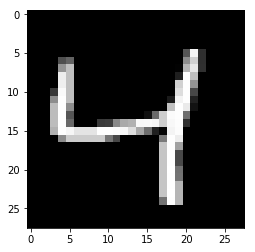

In [6]:
img = mnist.train.images[2]

plt.imshow(img.reshape((28, 28)), cmap='Greys_r')


In [11]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [12]:
#Train the model

sess = tf.Session()

epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6904
Epoch: 1/20... Training loss: 0.6872
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6781
Epoch: 1/20... Training loss: 0.6726
Epoch: 1/20... Training loss: 0.6640
Epoch: 1/20... Training loss: 0.6550
Epoch: 1/20... Training loss: 0.6438
Epoch: 1/20... Training loss: 0.6328
Epoch: 1/20... Training loss: 0.6206
Epoch: 1/20... Training loss: 0.6041
Epoch: 1/20... Training loss: 0.5881
Epoch: 1/20... Training loss: 0.5700
Epoch: 1/20... Training loss: 0.5539
Epoch: 1/20... Training loss: 0.5330
Epoch: 1/20... Training loss: 0.5135
Epoch: 1/20... Training loss: 0.5005
Epoch: 1/20... Training loss: 0.4815
Epoch: 1/20... Training loss: 0.4587
Epoch: 1/20... Training loss: 0.4389
Epoch: 1/20... Training loss: 0.4234
Epoch: 1/20... Training loss: 0.4084
Epoch: 1/20... Training loss: 0.3942
Epoch: 1/20... Training loss: 0.3868
Epoch: 1/20... Training loss: 0.3743
Epoch: 1/20... Training loss: 0.3653
E

Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1860
E

Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1571
E

Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1370
E

Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1216
E

Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1109
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1141
E

Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1122
E

Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1020
E

Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1076
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0989
E

Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0914
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0983
E

Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0995
E

Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0879
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0893
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0882
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0852
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0888
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0992
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20

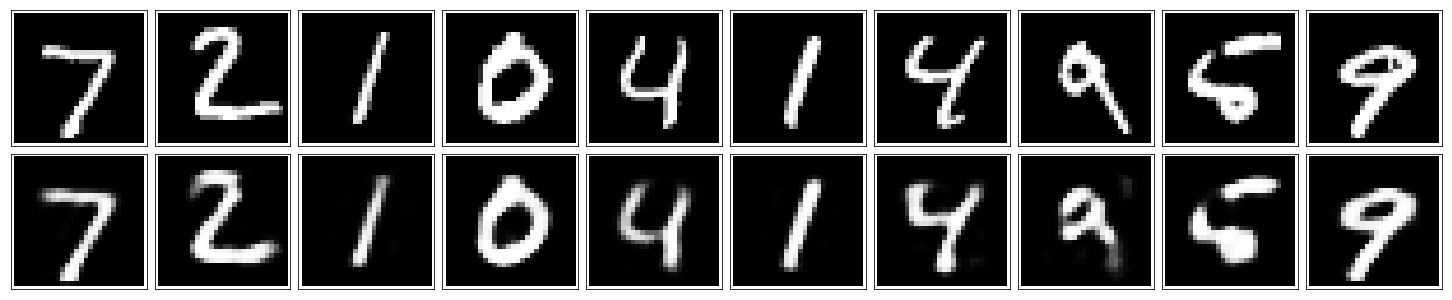

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [15]:
sess.close()

In [16]:
#The result look good except a couple blurry